In [27]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv", index_col = 0)

In [3]:
df = df[["TV", "Sales"]]

In [4]:
y = df.Sales
X = df.TV

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


"""Implementation of OLS for simple regression"""


#Read data

class OLS():
    def __init__(self):
        pass

    #Fit
    #Computes b0 and b1 using OLS
    def fit(self, X,y):
        beta_1 = np.sum((X - np.mean(X))*(y - np.mean(y)))/np.sum((X - np.mean(X))**2)
        beta_0 = np.mean(y) - beta_1 * np.mean(X)

        return np.round(beta_0, 4), np.round(beta_1, 4)

    
    def predict(self, X):
        return (beta_0 + beta_1 * X)

    def score(self, y_predict, y):
        return np.round(r2_score(y_predict, y),3)



if __name__ == "__main__":
    df = pd.read_csv("Advertising.csv", index_col = 0)   
    df = df[["TV", "Sales"]] 
    y = df.Sales
    X = df.TV
    
    # X,y = make_regression(n_features= 1, n_samples=1000, n_informative= 1)
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
     random_state = 42)
    ols = OLS()
    beta_0, beta_1 = ols.fit(X_train,y_train)
    print("Beta_0:",beta_0)
    print("Beta_1:",beta_1)
    
    y_pred = ols.predict(X_test)
    print("R2_score:", ols.score(y_test,y_pred))

Beta_0: 7.1196
Beta_1: 0.0465
R2_score: 0.677


In [6]:
y_pred = ols.predict(X)
RSS = np.sum((y - y_pred)**2)
RSE = np.sqrt(RSS/(df.shape[0] - 2)) #estimate of population standard deviation
SE_b1= RSE/np.sqrt(np.sum((X - np.mean(X))**2))


In [25]:
import scipy.stats
t_c = beta_1/SE_b1
#p_value??
pval = scipy.stats.t.sf(abs(t_c), df= 198)*2
t_c

17.27235642324626

In [8]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
model = sm.OLS(y,X2)
results = model.fit()
results.params

const    7.032594
TV       0.047537
dtype: float64

In [9]:
results.tvalues

const    15.360275
TV       17.667626
dtype: float64

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        17:03:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [11]:
results.rsquared

0.611875050850071

In [12]:
y_pred

1      17.81925
2       9.18885
3       7.91940
4      14.16435
5      15.52680
         ...   
196     8.89590
197    11.49990
198    15.35010
199    20.30700
200    17.91225
Name: TV, Length: 200, dtype: float64

In [26]:
df

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5


C:\Users\malfaro\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

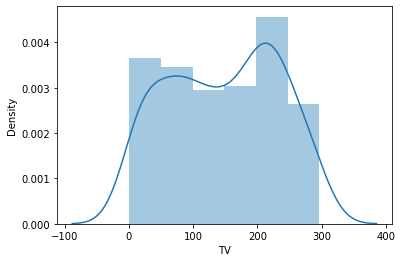

In [28]:
sns.distplot(df.TV)

In [31]:
df.TV.skew(), df.TV.kurt()

(-0.06985336213274573, -1.2264948242299691)

In [32]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

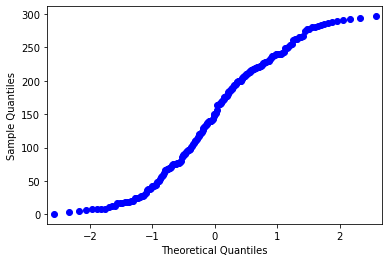

In [35]:
fig = sm.qqplot(df.TV)
plt.show()